In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score

In [182]:
df = pd.read_csv('master_df.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,basement,Renovated,year,month,age_when_sold
0,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,1,1,2014,12,63
1,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,0,0,2015,2,82
2,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,1,0,2014,12,49
3,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,98074,47.6168,-122.045,1800,7503,0,0,2015,2,28
4,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,0,3,...,98053,47.6561,-122.005,4760,101930,1,0,2014,5,13


In [181]:
df.loc[df['age_when_sold'] == -1]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,basement,Renovated,year,month,age_when_sold
1541,2014-06-25,597326.0,4,4.00,3570,8250,2.0,0,0,3,...,98040,47.5784,-122.226,2230,10000,1,0,2014,6,-1
2346,2014-10-29,385195.0,1,1.00,710,6000,1.5,0,0,3,...,98144,47.5756,-122.316,1440,4800,0,0,2014,10,-1
6591,2014-12-31,614285.0,5,2.75,2730,6401,2.0,0,0,3,...,98072,47.7685,-122.160,2520,6126,0,0,2014,12,-1
7033,2014-06-24,455000.0,2,1.50,1200,1259,2.0,0,0,3,...,98144,47.6001,-122.298,1320,1852,1,0,2014,6,-1
17462,2014-08-01,455000.0,3,1.75,1320,1014,3.0,0,0,3,...,98122,47.6047,-122.305,1380,1495,0,0,2014,8,-1
18317,2014-08-28,357000.0,5,2.50,2990,9240,2.0,0,0,3,...,98133,47.7384,-122.348,1970,18110,0,0,2014,8,-1
18390,2014-07-09,595000.0,4,3.25,3730,4560,2.0,0,0,3,...,98103,47.6725,-122.330,1800,4560,1,0,2014,7,-1
18487,2014-07-31,230000.0,3,1.50,1040,1264,2.0,0,0,3,...,98144,47.5951,-122.301,1350,3000,1,0,2014,7,-1
18758,2014-11-25,559000.0,2,3.00,1650,960,3.0,0,0,3,...,98103,47.6611,-122.346,1650,3000,1,0,2014,11,-1
18846,2014-05-20,490000.0,5,3.50,4460,2975,3.0,0,2,3,...,98119,47.6313,-122.370,2490,4231,0,0,2014,5,-1


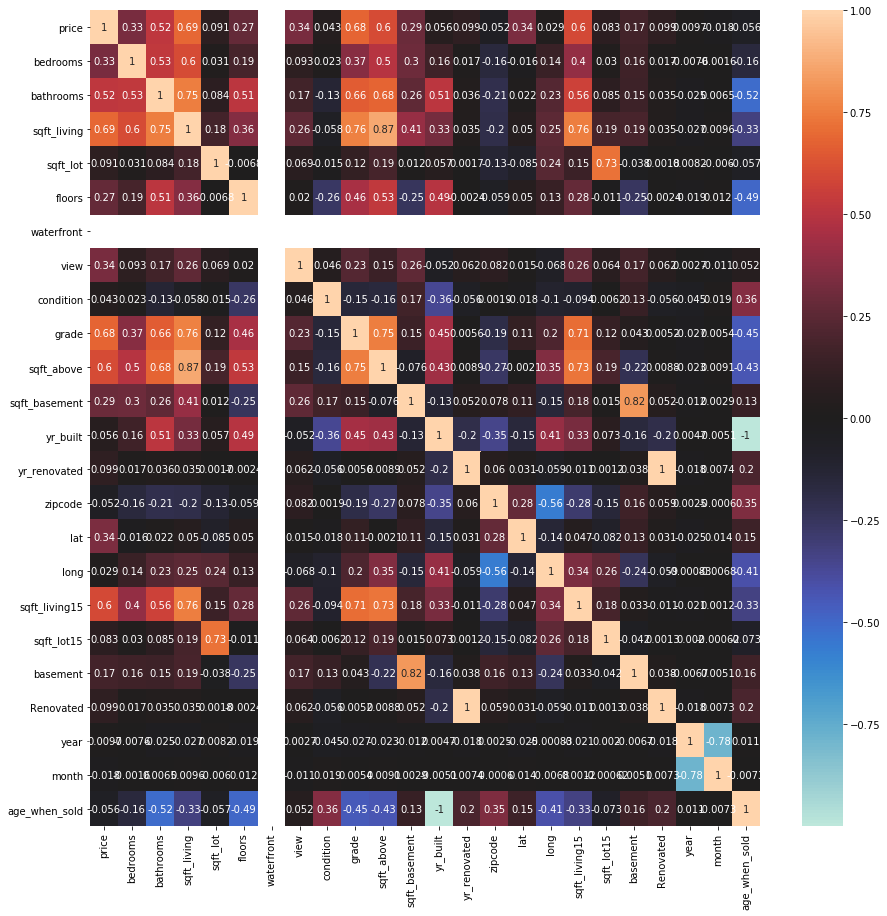

In [188]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), center=0, annot =True);
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [199]:
cor_df = df.corr().abs().stack().reset_index().sort_values(0, ascending = False)
cor_df.head()
cor_df['pairs'] = list(zip(df['level_0'], df['level_1']))

# cor_df.set_index(['pairs'], inplace = True)
# cor_df.drop(columns = ['level_1', 'level_0'], inplace = True)

# cor_df.columns = ['cc']
# cor_df.drop_duplicates(inplace = True)

KeyError: 'level_0'

In [189]:
df[(df.cc>.75) & (df.cc<1)]

AttributeError: 'DataFrame' object has no attribute 'cc'

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
basement         21597 non-null int64
year             21597 non-null int64
Renovated        21597 non-null int64
age_

In [183]:
to_dum = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'age_when_sold', 'month', 'year']
num = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
target = 'price'


In [155]:
df[to_dum] = df[to_dum].apply(pd.Categorical)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 25 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null category
bathrooms        21597 non-null category
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null category
waterfront       21597 non-null int64
view             21597 non-null category
condition        21597 non-null category
grade            21597 non-null category
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null category
yr_renovated     21597 non-null category
zipcode          21597 non-null category
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
basement         21597 non-null int64
year             21597 non-null category
Renovated       

In [156]:
mod_df = df.drop('date', axis = 1)

In [157]:
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in num:
    mod_df[feat] = norm_feat(df[feat])
mod_df.describe()

,price,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,basement,Renovated
count,1.905400e+04,1.905400e+04,1.905400e+04,19054.0,1.905400e+04,1.905400e+04,19054.000000,19054.000000,1.905400e+04,1.905400e+04,19054.000000,19054.000000
mean,9.844824e-17,2.386624e-16,-1.044148e-17,0.0,2.983280e-17,-4.176592e-17,47.560001,-122.213510,1.163479e-16,1.789968e-17,0.382754,0.032592
std,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,0.138902,0.140785,1.000000e+00,1.000000e+00,0.486072,0.177570
min,-1.391463e+00,-1.902042e+00,-3.544577e-01,0.0,-1.734702e+00,-6.491640e-01,47.155900,-122.519000,-2.333260e+00,-4.372463e-01,0.000000,0.000000
25%,-6.450543e-01,-7.260457e-01,-2.439011e-01,0.0,-7.270813e-01,-6.491640e-01,47.470875,-122.328000,-7.232049e-01,-2.760580e-01,0.000000,0.000000
50%,-2.440912e-01,-1.772473e-01,-1.813151e-01,0.0,-2.724233e-01,-6.491640e-01,47.572000,-122.230000,-2.066886e-01,-1.854824e-01,0.000000,0.000000
75%,3.326789e-01,5.283507e-01,-1.079927e-01,0.0,5.140121e-01,5.780819e-01,47.678200,-122.124000,5.459494e-01,-9.774178e-02,1.000000,0.000000
max,8.916374e+00,1.284832e+01,4.011139e+01,0.0,9.373699e+00,8.914092e+00,47.777600,-121.315000,6.242386e+00,3.110295e+01,1.000000,1.000000


In [158]:
mod_df = pd.get_dummies(mod_df, drop_first = True)

In [159]:
mod_df.head()

,price,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,...,age_when_sold_106,age_when_sold_107,age_when_sold_108,age_when_sold_109,age_when_sold_110,age_when_sold_111,age_when_sold_112,age_when_sold_113,age_when_sold_114,age_when_sold_115
0,0.027330,0.561951,-0.189686,0,0.477148,0.277059,47.7210,-122.319,-0.428053,-0.184069,...,0,0,0,0,0,0,0,0,0,0
1,-1.076861,-1.454044,-0.122081,0,-1.243180,-0.649164,47.7379,-122.233,1.091981,-0.168744,...,0,0,0,0,0,0,0,0,0,0
2,0.230896,-0.121247,-0.244643,0,-0.899114,1.457994,47.5208,-122.393,-0.915054,-0.279681,...,0,0,0,0,0,0,0,0,0,0
3,-0.059031,-0.434847,-0.169145,0,-0.124967,-0.649164,47.6168,-122.045,-0.265719,-0.188997,...,0,0,0,0,0,0,0,0,0,0
4,2.161688,3.753942,2.131334,0,2.590693,2.893640,47.6561,-122.005,4.102533,3.232116,...,0,0,0,0,0,0,0,0,0,0


In [69]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Columns: 455 entries, price to month_12
dtypes: float64(10), int64(2), uint8(443)
memory usage: 11.1 MB


In [44]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'basement', 'year', 'Renovated',
       'age_when_sold', 'month'],
      dtype='object')

In [160]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
basement         0
Renovated        0
year             0
month            0
age_when_sold    0
dtype: int64

In [161]:
for col in mod_df.columns:
    for x in col:
        if x not in string.ascii_letters:
            if x not in string.digits and x != '_':
                print(x)

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


In [162]:
# mod_df = mod_df.apply(lambda x: x.replace('.', '_'))
def col_format(col):
    col = col.replace('.', '_')
    return col
mod_df.columns = [col_format(col) for col in mod_df.columns]
    


In [163]:
date = 'date'
lat = 'lat'
long = 'long'

In [165]:
x_cols = list(mod_df.columns)
x_cols.remove(target)
# x_cols.remove(date)
x_cols.remove(lat)
x_cols.remove(long)

In [166]:
X = mod_df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

C:\Users\damni\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\damni\anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('sqft_living', 140.06724887988312),
 ('sqft_lot', 2.2410441400314567),
 ('waterfront', nan),
 ('sqft_above', 116.9371550468137),
 ('sqft_basement', 35.44675619362921),
 ('sqft_living15', 3.549757428197219),
 ('sqft_lot15', 2.4040118878327488),
 ('basement', 4.036529150021839),
 ('Renovated', inf),
 ('bedrooms_2', 15.063332645370036),
 ('bedrooms_3', 34.06415223991808),
 ('bedrooms_4', 31.27167293302234),
 ('bedrooms_5', 10.90465876079208),
 ('bedrooms_6', 2.7599034800806854),
 ('bedrooms_7', 1.410143151870085),
 ('bedrooms_8', 1.1795010548856624),
 ('bedrooms_9', 1.347293118948356),
 ('bedrooms_10', 1.0799680760711585),
 ('bedrooms_11', 1.1124780124929743),
 ('bathrooms_0_75', 16.37472903720342),
 ('bathrooms_1_0', 713.1889038277193),
 ('bathrooms_1_25', 2.802163272062246),
 ('bathrooms_1_5', 305.93632151332554),
 ('bathrooms_1_75', 593.5680901106358),
 ('bathrooms_2_0', 399.94138776529104),
 ('bathrooms_2_25', 413.11444827379313),
 ('bathrooms_2_5', 920.0891708298499),
 ('bathrooms_

In [127]:
test_x = list(mod_df.columns).remove(target)

In [167]:
train, test = train_test_split(mod_df)

In [168]:
predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     187.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:30:30   Log-Likelihood:                -6346.3
No. Observations:               14290   AIC:                         1.358e+04
Df Residuals:                   13847   BIC:                         1.693e+04
Df Model:                         442                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.1844      0.482     -2.459      0.014      -2.129      -0.240
sqft_living           0.2410      0.038      6.321      0.000       0.166       0.316
sqft_lot              0.0354      0.005      7.309      0.000       0.026       0.045
waterfront         7.437e-14    2.8e-14      2.660      0.008    1.96e-14    1.29e-13
sqft_above            0.1289      0.035      3.697      0.000       0.061       0.197
sqft_basement         0.0184      0.019      0.958      0.338      -0.019       0.056
sqft_living15         0.0510      0.006      8.399      0.000       0.039       0.063
sqft_lot15           -0.0094      0.005     -1.862      0.063      -0.019       0.000
basement             -0.0172      0.013     -1.287      0.198      -0.043       0.009
Renovated             0.0864      0.031      2.821      0.005       0.026       0.146
bedrooms_2            0.0150      0.038      0.391      0.695      -0.060       0.090
bedrooms_3            0.0424      0.039      1.102      0.271      -0.033       0.118
bedrooms_4            0.0144      0.039      0.367      0.714      -0.063       0.092
bedrooms_5           -0.0430      0.041     -1.040      0.298      -0.124       0.038
bedrooms_6           -0.1569      0.050     -3.124      0.002      -0.255      -0.058
bedrooms_7            0.0839      0.096      0.878      0.380      -0.103       0.271
bedrooms_8            0.1504      0.148      1.015      0.310      -0.140       0.441
bedrooms_9           -1.1563      0.400     -2.894      0.004      -1.940      -0.373
bedrooms_10          -0.6565      0.287     -2.290      0.022      -1.218      -0.095
bedrooms_11          -0.4467      0.409     -1.092      0.275      -1.249       0.355
bathrooms_0_75        0.1982      0.233      0.851      0.395      -0.259       0.655
bathrooms_1_0         0.1821      0.225      0.810      0.418      -0.258       0.623
bathrooms_1_25        0.1211      0.275      0.441      0.659      -0.418       0.660
bathrooms_1_5         0.1772      0.225      0.787      0.431      -0.264       0.619
bathrooms_1_75        0.1669      0.225      0.741      0.458      -0.274       0.608
bathrooms_2_0         0.1772      0.225      0.787      0.431      -0.264       0.619
bathrooms_2_25        0.2257      0.225      1.002      0.316      -0.216       0.667
bathrooms_2_5         0.2054      0.225      0.912      0.362      -0.236       0.647
bathrooms_2_75        0.2047      0.226      0.908      0.364      -0.237       0.647
bathrooms_3_0         0.2282      0.226      1.010      0.312      -0.215       0.671
bathrooms_3_25        0.3968      0.226      1.753      0.080      -0.047       0.840
bathrooms_3_5         0.2792      0.226      1.235      0.217      -0.164       0.723
bathrooms_3_75        0.5303      0.229      2.317      0.021       0.082

In [169]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')

In [170]:
predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     473.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:31:15   Log-Likelihood:                -7270.1
No. Observations:               14290   AIC:                         1.485e+04
Df Residuals:                   14136   BIC:                         1.601e+04
Df Model:                         153                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.9738      0.046    -21.055      0.000      -1.065      -0.883
sqft_living           0.3085      0.008     36.680      0.000       0.292       0.325
sqft_lot              0.0337      0.004      8.662      0.000       0.026       0.041
waterfront        -8.178e-15   6.36e-15     -1.286      0.198   -2.06e-14    4.29e-15
sqft_above            0.1701      0.009     18.261      0.000       0.152       0.188
sqft_living15         0.0949      0.006     15.668      0.000       0.083       0.107
Renovated             0.1221      0.023      5.328      0.000       0.077       0.167
bedrooms_6           -0.2520      0.032     -7.826      0.000      -0.315      -0.189
bedrooms_9           -1.3915      0.289     -4.815      0.000      -1.958      -0.825
bedrooms_10          -0.8472      0.288     -2.946      0.003      -1.411      -0.284
bathrooms_3_75        0.3109      0.041      7.497      0.000       0.230       0.392
bathrooms_4_0         0.3604      0.045      8.025      0.000       0.272       0.448
bathrooms_4_25        0.4959      0.061      8.112      0.000       0.376       0.616
bathrooms_4_5         0.2428      0.055      4.420      0.000       0.135       0.350
bathrooms_4_75        1.3971      0.114     12.214      0.000       1.173       1.621
bathrooms_5_0         0.3641      0.114      3.191      0.001       0.140       0.588
bathrooms_5_5         0.8865      0.208      4.271      0.000       0.480       1.293
bathrooms_6_0         2.1393      0.406      5.266      0.000       1.343       2.936
bathrooms_6_25        4.1288      0.409     10.094      0.000       3.327       4.931
bathrooms_6_5         1.0697      0.415      2.580      0.010       0.257       1.882
bathrooms_6_75       -2.2524      0.408     -5.516      0.000      -3.053      -1.452
floors_1_5           -0.0472      0.013     -3.510      0.000      -0.074      -0.021
floors_2_0           -0.0439      0.011     -3.947      0.000      -0.066      -0.022
floors_2_5            0.2503      0.042      5.971      0.000       0.168       0.332
floors_3_0           -0.1544      0.025     -6.213      0.000      -0.203      -0.106
floors_3_5            0.5120      0.236      2.167      0.030       0.049       0.975
view_1                0.2798      0.029      9.573      0.000       0.223       0.337
view_2                0.2315      0.017     13.381      0.000       0.198       0.265
view_3                0.5229      0.024     21.962      0.000       0.476       0.570
view_4                0.9726      0.038     25.313      0.000       0.897       1.048
condition_3           0.1075      0.036      2.991      0.003       0.037       0.178
condition_4           0.1813      0.036      5.006      0.000       0.110       0.252
condition_5           0.3393      0.038      8.992      0.000       0.265

In [171]:
X = mod_df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

C:\Users\damni\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


[('sqft_living', 6.086629352951743),
 ('sqft_lot', 1.21163370235263),
 ('waterfront', nan),
 ('sqft_above', 7.529820430520746),
 ('sqft_living15', 3.1585696110596646),
 ('Renovated', 1.509235080904372),
 ('bedrooms_6', 1.082957245005355),
 ('bedrooms_9', 1.0393456301083226),
 ('bedrooms_10', 1.0074906018590524),
 ('bathrooms_3_75', 1.0660673625525934),
 ('bathrooms_4_0', 1.082396994926075),
 ('bathrooms_4_25', 1.0678296923297952),
 ('bathrooms_4_5', 1.0972556826478528),
 ('bathrooms_4_75', 1.0347440801160446),
 ('bathrooms_5_0', 1.0266860525388624),
 ('bathrooms_5_5', 1.0360440260889843),
 ('bathrooms_6_0', 1.034205941503511),
 ('bathrooms_6_25', 1.0158609366846798),
 ('bathrooms_6_5', 1.0378615790841308),
 ('bathrooms_6_75', 1.0132714833232868),
 ('floors_1_5', 1.3822171422849585),
 ('floors_2_0', 4.066347948777361),
 ('floors_2_5', 1.131703880637837),
 ('floors_3_0', 1.5262038860462184),
 ('floors_3_5', 1.0152836743521148),
 ('view_1', 1.06794531352639),
 ('view_2', 1.146260341169945

In [172]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

154 117


In [173]:
predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     411.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:32:45   Log-Likelihood:                -9636.4
No. Observations:               14290   AIC:                         1.951e+04
Df Residuals:                   14172   BIC:                         2.040e+04
Df Model:                         117                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.8252      0.014    -60.922      0.000      -0.852      -0.799
sqft_lot              0.0667      0.005     14.788      0.000       0.058       0.075
sqft_living15         0.3526      0.006     61.753      0.000       0.341       0.364
Renovated             0.1694      0.027      6.328      0.000       0.117       0.222
bedrooms_6            0.0110      0.038      0.292      0.770      -0.063       0.085
bedrooms_9           -0.7196      0.340     -2.115      0.034      -1.386      -0.053
bedrooms_10          -0.1154      0.338     -0.341      0.733      -0.778       0.547
bathrooms_3_75        0.6810      0.048     14.070      0.000       0.586       0.776
bathrooms_4_0         0.7107      0.053     13.525      0.000       0.608       0.814
bathrooms_4_25        1.0227      0.071     14.328      0.000       0.883       1.163
bathrooms_4_5         0.8071      0.064     12.626      0.000       0.682       0.932
bathrooms_4_75        1.9621      0.134     14.616      0.000       1.699       2.225
bathrooms_5_0         0.8578      0.134      6.402      0.000       0.595       1.120
bathrooms_5_5         2.2529      0.243      9.278      0.000       1.777       2.729
bathrooms_6_0         3.1933      0.478      6.676      0.000       2.256       4.131
bathrooms_6_25        6.1793      0.479     12.907      0.000       5.241       7.118
bathrooms_6_5         3.2597      0.483      6.744      0.000       2.312       4.207
bathrooms_6_75       -0.5775      0.480     -1.203      0.229      -1.519       0.364
floors_1_5            0.1116      0.015      7.317      0.000       0.082       0.141
floors_2_0            0.2215      0.010     22.107      0.000       0.202       0.241
floors_2_5            0.7162      0.048     14.935      0.000       0.622       0.810
floors_3_0            0.0416      0.026      1.593      0.111      -0.010       0.093
floors_3_5            0.9693      0.278      3.491      0.000       0.425       1.514
view_1                0.3390      0.034      9.867      0.000       0.272       0.406
view_2                0.2766      0.020     13.667      0.000       0.237       0.316
view_3                0.6106      0.028     21.982      0.000       0.556       0.665
view_4                1.0275      0.045     22.801      0.000       0.939       1.116
condition_5           0.2561      0.015     16.792      0.000       0.226       0.286
grade_11              0.9466      0.034     28.083      0.000       0.881       1.013
grade_12              1.9863      0.071     27.786      0.000       1.846       2.126
yr_built_2000        -0.0608      0.050     -1.211      0.226      -0.159       0.038
yr_built_2015         0.2467      0.093      2.665      0.008       0.065       0.428
yr_renovated_1953    -0.1478      0.479     -0.309      0.758      -1.087

In [174]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')

In [175]:
predictors = '+'.join(x_cols)
formula = target + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     481.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):               0.00
Time:                        16:32:52   Log-Likelihood:                -9648.2
No. Observations:               14290   AIC:                         1.950e+04
Df Residuals:                   14189   BIC:                         2.026e+04
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.8317      0.011    -74.816      0.000      -0.853      -0.810
sqft_lot              0.0669      0.005     14.866      0.000       0.058       0.076
sqft_living15         0.3524      0.006     61.958      0.000       0.341       0.364
Renovated             0.1811      0.026      6.972      0.000       0.130       0.232
bedrooms_9           -0.7243      0.340     -2.129      0.033      -1.391      -0.058
bathrooms_3_75        0.6808      0.048     14.102      0.000       0.586       0.775
bathrooms_4_0         0.7165      0.052     13.665      0.000       0.614       0.819
bathrooms_4_25        1.0298      0.071     14.480      0.000       0.890       1.169
bathrooms_4_5         0.8102      0.063     12.843      0.000       0.687       0.934
bathrooms_4_75        1.9664      0.134     14.653      0.000       1.703       2.229
bathrooms_5_0         0.8619      0.134      6.440      0.000       0.600       1.124
bathrooms_5_5         2.2457      0.243      9.249      0.000       1.770       2.722
bathrooms_6_0         3.1810      0.478      6.652      0.000       2.244       4.118
bathrooms_6_25        6.1866      0.479     12.920      0.000       5.248       7.125
bathrooms_6_5         3.2580      0.483      6.739      0.000       2.310       4.206
floors_1_5            0.1080      0.015      7.160      0.000       0.078       0.138
floors_2_0            0.2210      0.010     22.568      0.000       0.202       0.240
floors_2_5            0.7122      0.048     14.913      0.000       0.619       0.806
floors_3_5            0.9496      0.278      3.421      0.001       0.405       1.494
view_1                0.3371      0.034      9.812      0.000       0.270       0.404
view_2                0.2761      0.020     13.660      0.000       0.236       0.316
view_3                0.6117      0.028     22.044      0.000       0.557       0.666
view_4                1.0283      0.045     22.827      0.000       0.940       1.117
condition_5           0.2543      0.015     16.743      0.000       0.225       0.284
grade_11              0.9429      0.034     28.111      0.000       0.877       1.009
grade_12              1.9850      0.071     27.805      0.000       1.845       2.125
yr_built_2015         0.2544      0.092      2.750      0.006       0.073       0.436
yr_renovated_1970    -0.6414      0.183     -3.513      0.000      -0.999      -0.284
yr_renovated_1980    -0.8968      0.339     -2.646      0.008      -1.561      -0.232
yr_renovated_1985    -0.7164      0.183     -3.918      0.000      -1.075      -0.358
yr_renovated_1994     0.5920      0.147      4.037      0.000       0.305       0.879
yr_renovated_1995     0.8720      0.197      4.419      0.000       0.485       1.259
yr_renovated_1999     0.4195      0.147      2.859      0.004       0.132

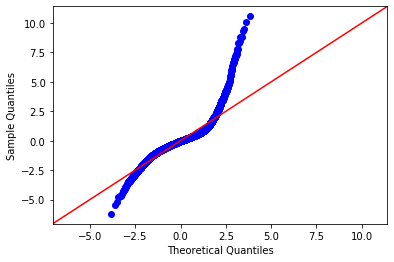

In [176]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

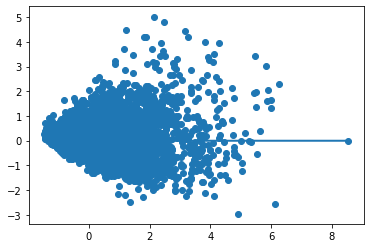

In [177]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [205]:
from sklearn.linear_model import LinearRegression

In [206]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [207]:
cv_scores = cross_val_score(ols, X, mod_df['price'], scoring='r2', cv=5, n_jobs=-1) 

In [208]:
cv_scores

array([-5.63096542e+17,  8.05422923e-01,  8.16083100e-01,  8.37525858e-01,
       -5.80386140e+15])